In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mtlp
import seaborn as sns
import matplotlib as mtlp
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# A. Purpose

## This notebook is personal note to understand table type of charts need to prepare during EDA.

### We explore with:
1. Histogram
2. Bar chart: single/multiple variables, stacked, percen values
3. Pie Chart
4. Line Chart
5. Area Chart
6. Scatter plot
7. Tree map
8. Warterfall Chart
9. Box plot

### And focus at know the [structure of dataframe](http://https://seaborn.pydata.org/tutorial/data_structure.html) input and syntaxs

## I. Seaborn

Follow the document of Seaborn, this is defination:
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Customize Seaborn chart:
- sns.set_palette("Set2") #=> set palette color for charts. Remind that if you set paltte, all of chart follow that.
- combine with pylot to set: bar_lable, figsize


- Libary Seaborn must be import before do something

In [2]:
import seaborn as sns

### 1. Histogram

### Define
- Histogram is a graphical representation that organizes a group of data points into user-specified ranges.
- Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

Structure of input table is wide table (row is only unique and has many features by columns)

In [3]:
data=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", delimiter='\t')
data=data[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency']]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94


### a. Plot single variables and customize axes

<AxesSubplot:xlabel='Recency', ylabel='Count'>

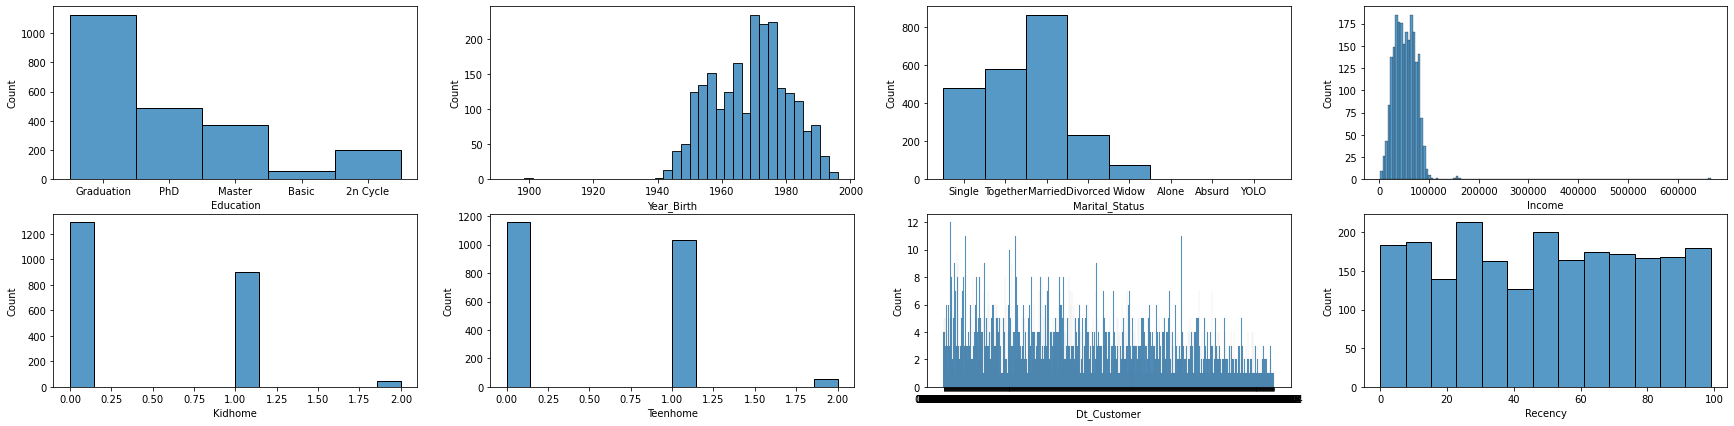

In [4]:
data # table wide type
fig,axes=plt.subplots(2,4,figsize=[30,7])
sns.histplot(data['Education'],ax=axes[0][0])
sns.histplot(data['Year_Birth'],ax=axes[0][1])
sns.histplot(data['Marital_Status'],ax=axes[0][2])
sns.histplot(data[ 'Income'],ax=axes[0][3])
sns.histplot(data['Kidhome'],ax=axes[1][0])
sns.histplot(data['Teenhome'],ax=axes[1][1])
sns.histplot(data['Dt_Customer'],ax=axes[1][2])
sns.histplot(data['Recency'],ax=axes[1][3])


### b. Plot all features row by row or col by col. Usefull with some features

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


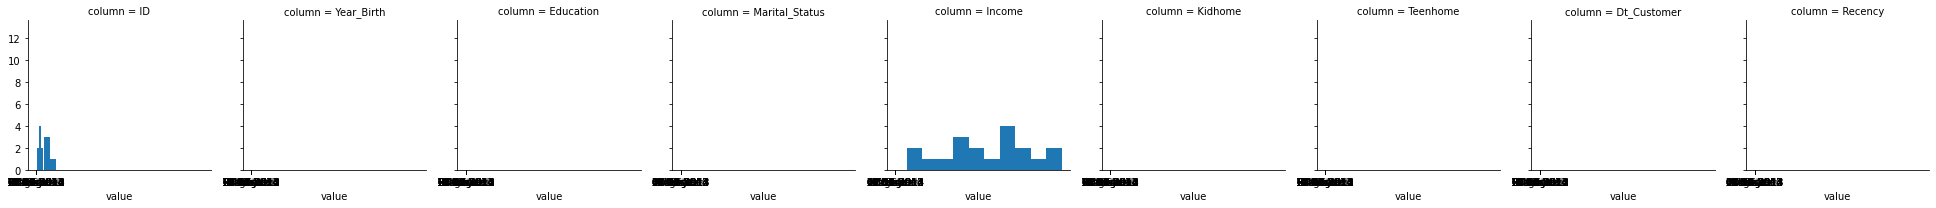

In [5]:
# first of all, created datafrane have only 2 columns: name_variables, value_variables
b=data.head(20)
b=b.melt(var_name='column') # => table long type
# plot combine between histogram and FaceGrib
g = sns.FacetGrid(b, col='column') # => use row='column' to plot row by row

g.map(plt.hist, 'value')

### c. Using kdeplot
- Plot univariate or bivariate distributions using kernel density estimation.



#### Basic
##### Structure of input table: Wide table

In [6]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26


<AxesSubplot:xlabel='Kidhome', ylabel='Density'>

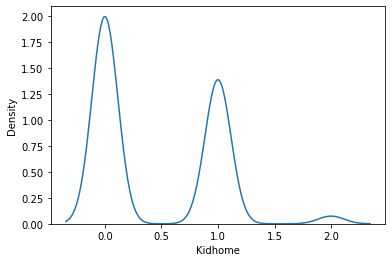

In [7]:
sns.kdeplot(data=data['Kidhome'])

<AxesSubplot:xlabel='Kidhome', ylabel='Density'>

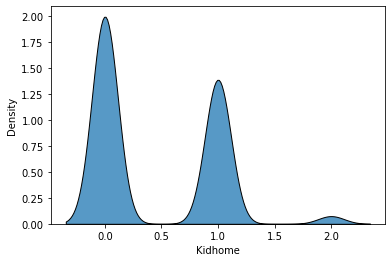

In [8]:
sns.kdeplot(data=data['Kidhome'],multiple="stack")

#### Plot multiple variables with the same size
##### Structure of input table: long table

In [9]:
c=data[['ID','Education','Income']]
c.head(3)
# only one columns contains values by number


,ID,Education,Income
0,5524,Graduation,58138.0
1,2174,Graduation,46344.0
2,4141,Graduation,71613.0


##### when we want to know distrubuition of Icome dependence on Education

<AxesSubplot:xlabel='Income', ylabel='Density'>

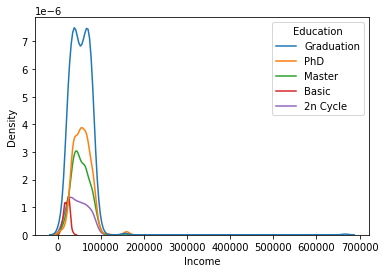

In [10]:
sns.kdeplot(data=c,x='Income',hue='Education')

##### Plot into axes

<AxesSubplot:xlabel='Income', ylabel='Density'>

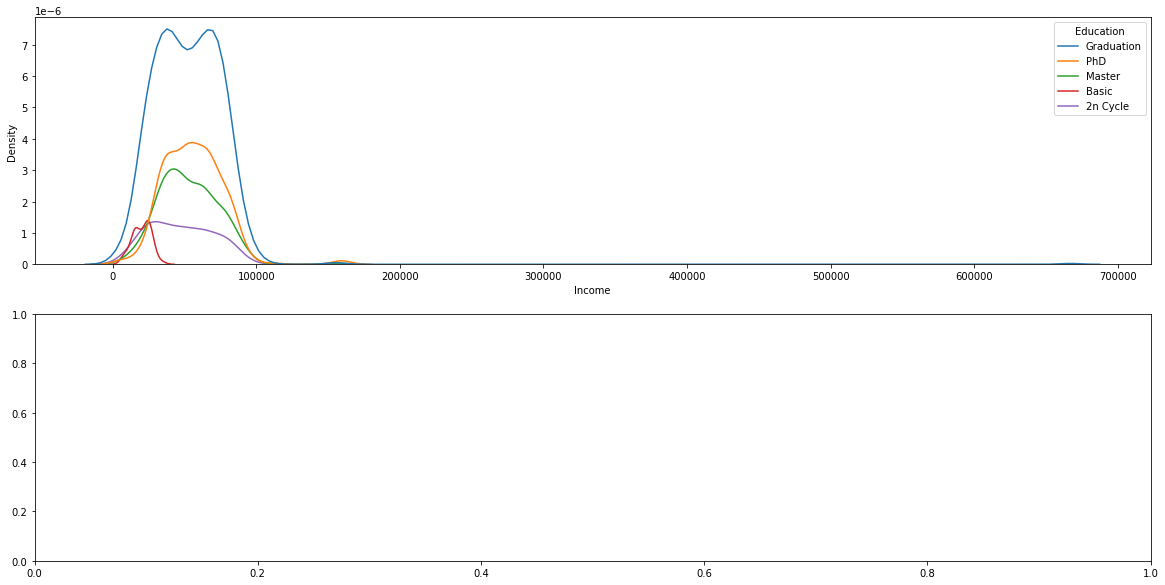

In [11]:
fig,axes=plt.subplots(2,figsize=[20,10])
sns.kdeplot(data=c,x='Income',hue='Education',ax=axes[0])

<AxesSubplot:xlabel='Income', ylabel='Density'>

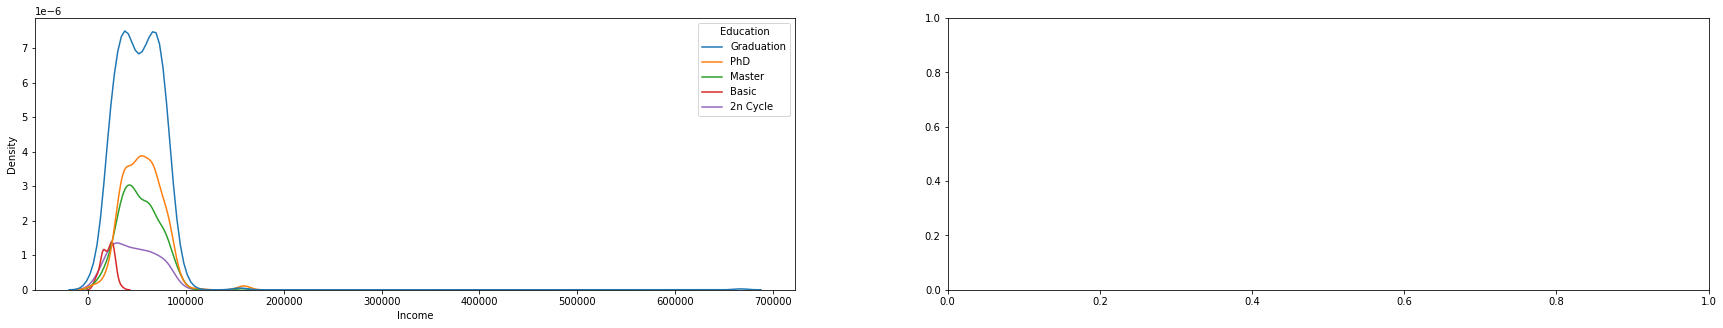

In [12]:
fig,axes=plt.subplots(1,2,figsize=[30,5])
sns.kdeplot(data=c,x='Income',hue='Education',ax=axes[0])

### 2. Bar Chart

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
 7   Dt_Customer     2240 non-null   object 
 8   Recency         2240 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 157.6+ KB


#### Single Bar
 - Using barplot: plot values of variables dependence on another variables
   

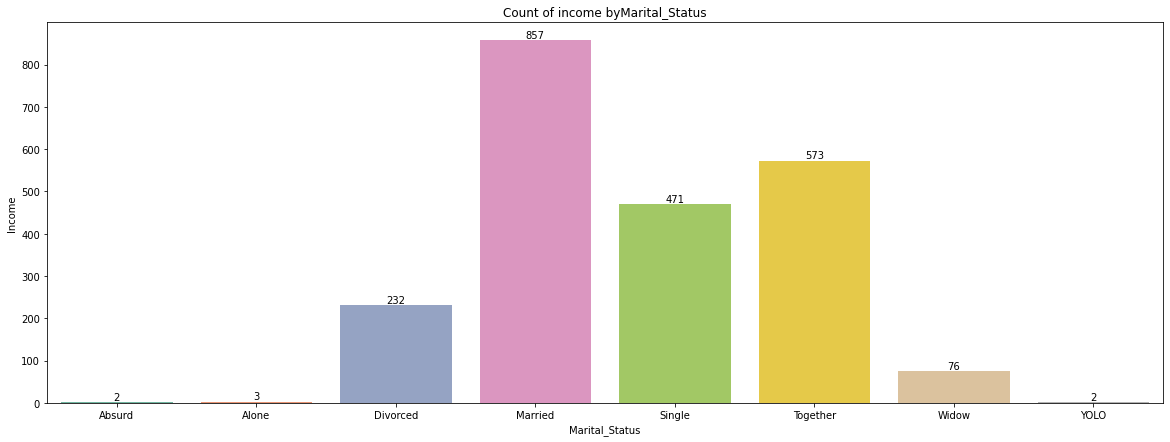

In [14]:
sns.set_palette("Set2") #=> set palette color for charts. Remind that if you set paltte, all of chart follow that.
income=data.groupby('Marital_Status').Income.count().reset_index()
plt.figure(figsize=(20, 7)) # => set size of chart 

a=sns.barplot(y=income['Income'],x=income['Marital_Status'])

plt.bar_label(a.containers[0]) # => add labe to chart by using pyplot

plt.title('Count of income byMarital_Status')
plt.show() # => close set up


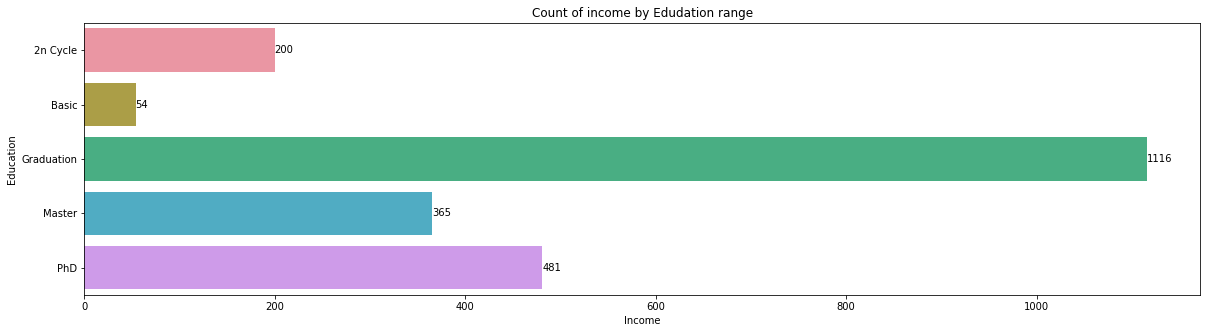

In [15]:
sns.set_palette("Paired",3) #=> set palette color for charts. Remind that if you set paltte, all of chart follow that.
income=data.groupby('Education').Income.count().reset_index()
plt.figure(figsize=(20, 5)) # => set size of chart 
# plt.subplots(2,4,figsize=[30,7])
a=sns.barplot(x=income['Income'],y=income['Education'])
plt.bar_label(a.containers[0]) # => add labe to chart by using pyplot
plt.title('Count of income by Edudation range')
plt.show() # => close set up
###


- Using countplot: The same way with histogram. count distrubuition of variable

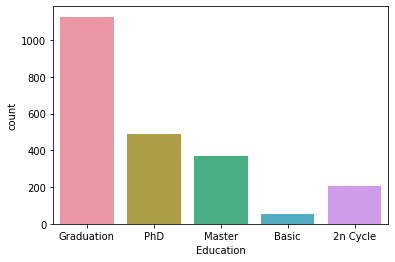

In [16]:
a=sns.countplot(x='Education',data=data)

- Combine with catplot

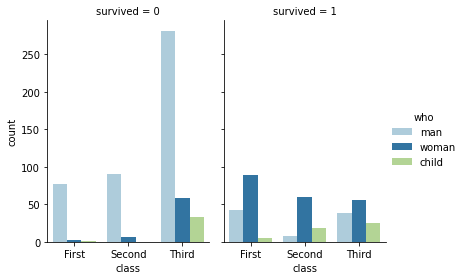

In [17]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="class", hue="who", col="survived",
                data=titanic, kind="count",
                height=4, aspect=.7)

#### Stacked Bar
##### Stacked Bar is not convience in Seaborn

### 3. Pie Chart

### 4. Line Chart

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

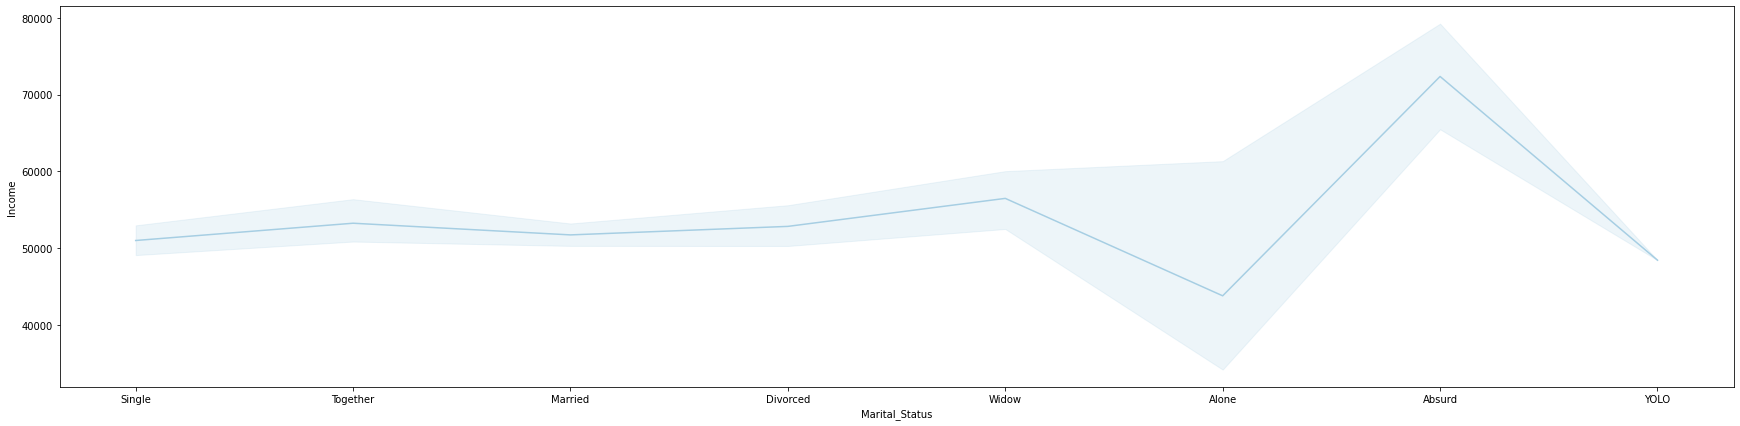

In [18]:
plt.subplots(figsize=(30,7))
sns.lineplot(y='Income',data=data,x='Marital_Status')


### 5. Area Chart

### 6. Scatter plot

<AxesSubplot:xlabel='Recency', ylabel='Income'>

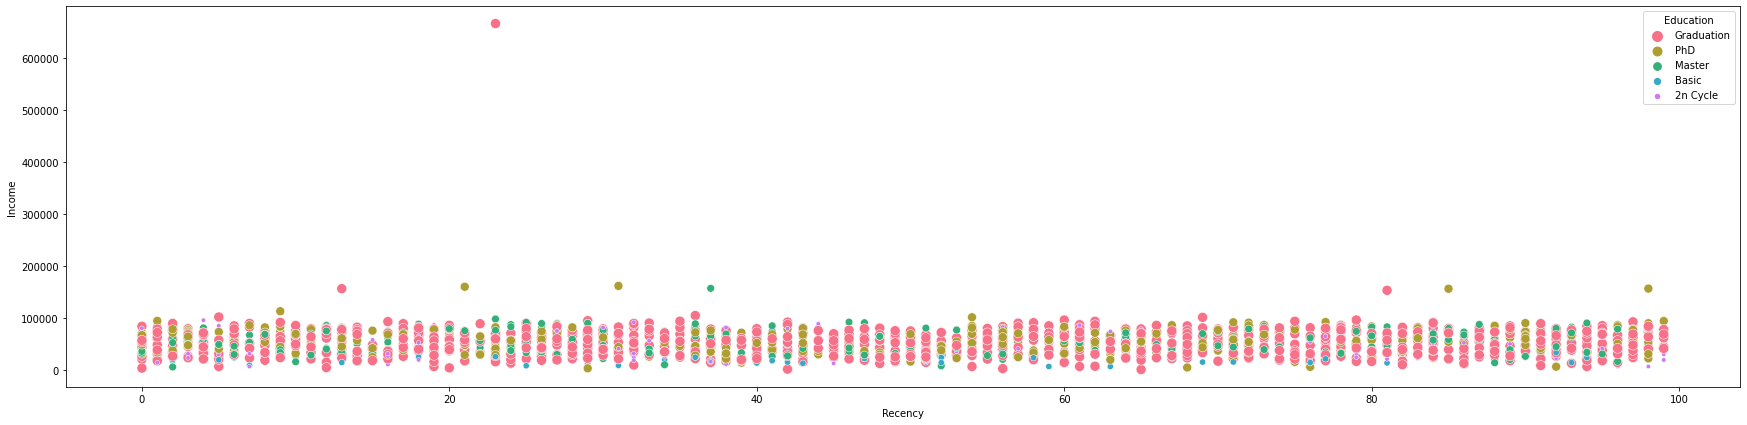

In [19]:
plt.subplots(figsize=(30,7))
sns.scatterplot(x='Recency',y='Income',data=data,hue='Education',size='Education',sizes=(20,100))

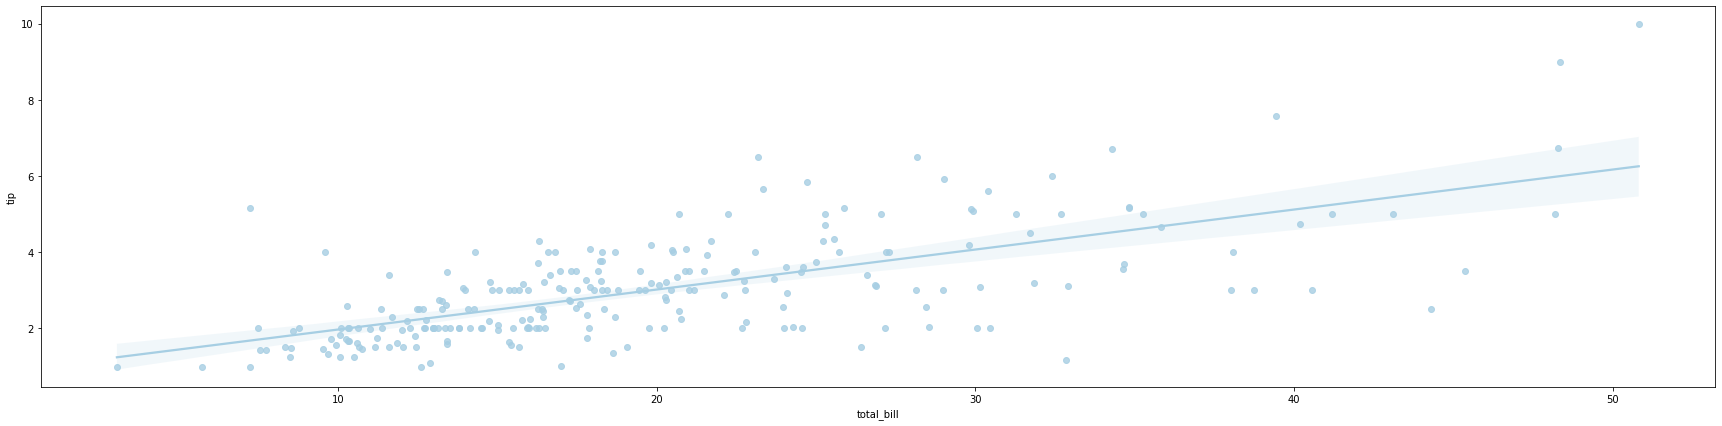

In [20]:
plt.subplots(figsize=(30,7))
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

### 7. Tree map

### 8. Warterfall Chart

### 9. Box plot

### Summary at Sep, 25th

There are many ways and tools to visualization in EDA. So, before that,need to deep understand type table and how it works.

And to day, I learned a litle bit about searbon, how to plot histogram, barplot. customize color,figsize and add lable_value for them.
I aslo knew how to use combine seaborn and matplotlip.pylot to customize this charts.

So amazing and a lot of things need to know and understand that.
Keep move on.

## II. Matplotlib

### this is the same way Seaborn plot

(array([233., 223., 236., 214., 216., 234., 213., 224., 229., 218.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

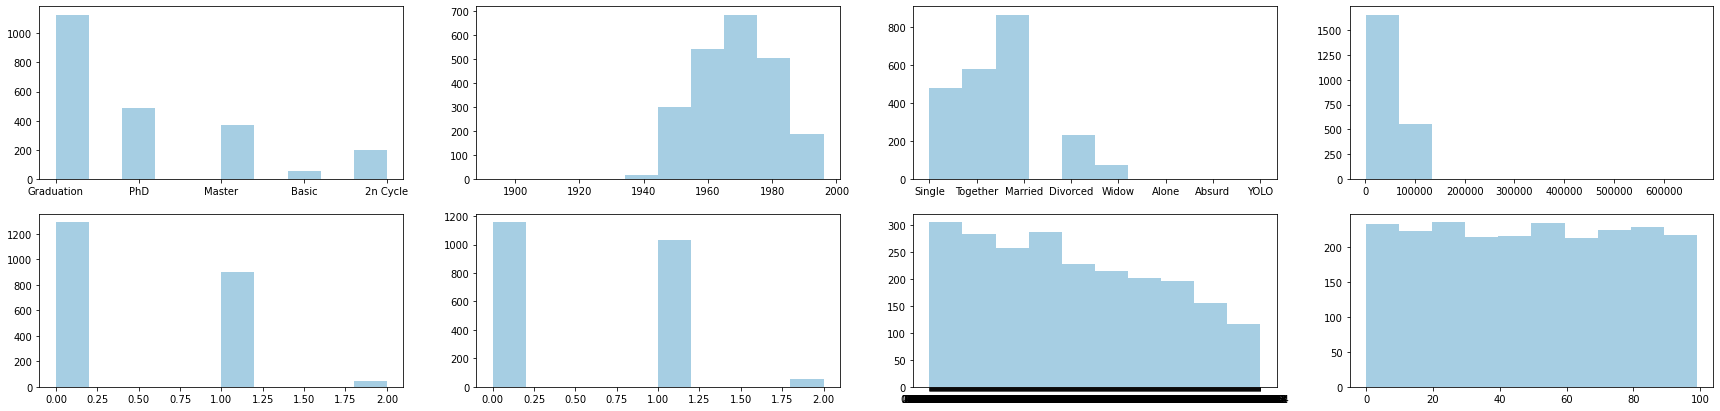

In [21]:
fig,axes=plt.subplots(2,4,figsize=[30,7])
axes[0][0].hist(data['Education'])
axes[0][1].hist(data['Year_Birth'])
axes[0][2].hist(data['Marital_Status'])
axes[0][3].hist(data[ 'Income'])
axes[1][0].hist(data['Kidhome'])
axes[1][1].hist(data['Teenhome'])
axes[1][2].hist(data['Dt_Customer'])
axes[1][3].hist(data['Recency'])

## III. Python plot

In [22]:
data.info()
import plotly.express as px 
#=> This is "Chân ái" in Vietnammese https://plotly.com/python/plotly-express/


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
 7   Dt_Customer     2240 non-null   object 
 8   Recency         2240 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 157.6+ KB


In [23]:
income

,Education,Income
0,2n Cycle,200
1,Basic,54
2,Graduation,1116
3,Master,365
4,PhD,481


In [24]:
px.bar(income,x='Education',y='Income',color='Education')

### Auto plot histogram of al nummerical features

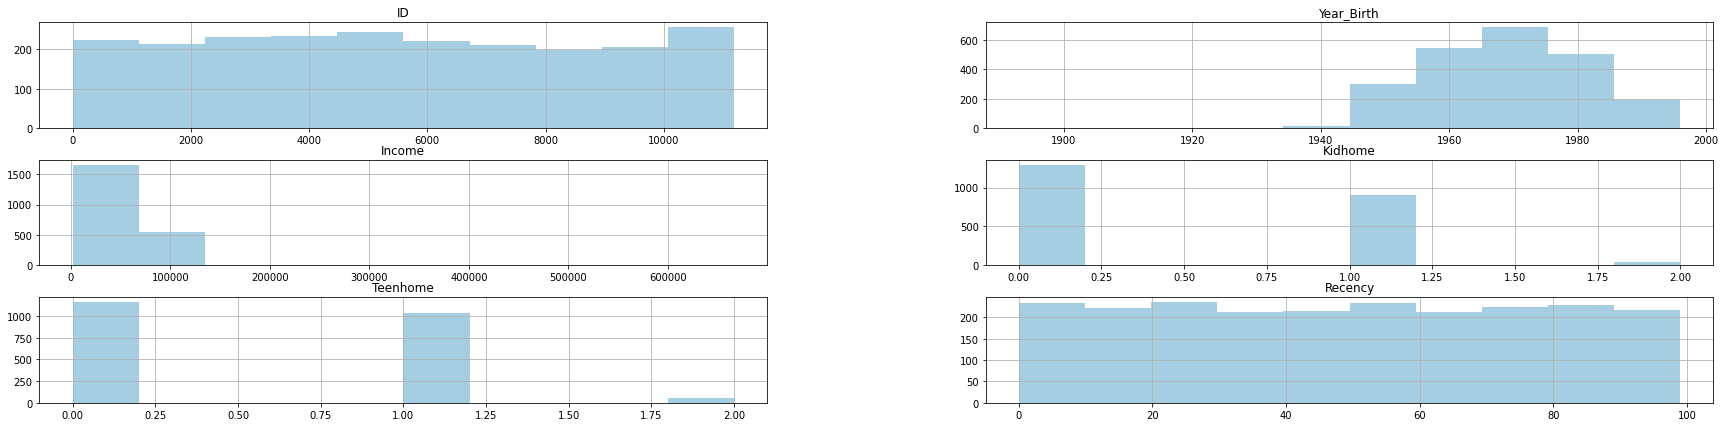

In [25]:
hist = data.hist(figsize=[30,7]) #=> only plot features typy integer

### When all features have the same size, can use this chart to plot histogram


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

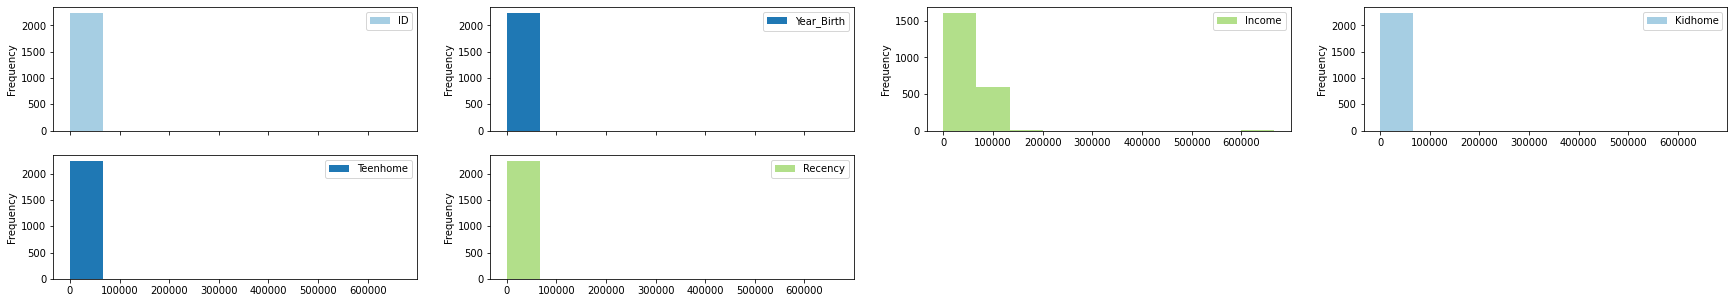

In [26]:
data.plot.hist(subplots=True,legend=True, layout=(2,4),figsize=(30,5))